In [3]:
import tensorflow as tf
import random as rd
import numpy as np
import tensorflow.keras as ks
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [4]:
tf.__version__
help(ks)

Help on package tensorflow_core.python.keras.api._v2.keras in tensorflow_core.python.keras.api._v2:

NAME
    tensorflow_core.python.keras.api._v2.keras - Implementation of the Keras API meant to be a high-level API for TensorFlow.

DESCRIPTION
    Detailed documentation and user guides are available at
    [keras.io](https://keras.io).

PACKAGE CONTENTS
    activations (package)
    applications (package)
    backend (package)
    callbacks (package)
    constraints (package)
    datasets (package)
    estimator (package)
    experimental (package)
    initializers (package)
    layers (package)
    losses (package)
    metrics (package)
    mixed_precision (package)
    models (package)
    optimizers (package)
    premade (package)
    preprocessing (package)
    regularizers (package)
    utils (package)
    wrappers (package)

VERSION
    2.2.4-tf

FILE
    /Users/ujwal/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/__init__.py




In [5]:
test_samples = []
test_labels = []
for i in range(1000):
    random_younger = rd.randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = rd.randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
# help(rd)
print(test_samples, test_labels)

[19, 84, 39, 65, 43, 98, 29, 80, 62, 79, 33, 93, 48, 93, 48, 74, 63, 80, 33, 94, 52, 84, 59, 89, 48, 100, 61, 99, 53, 73, 15, 93, 37, 82, 46, 74, 51, 90, 32, 77, 46, 68, 17, 87, 44, 99, 21, 96, 14, 74, 62, 79, 59, 70, 16, 67, 57, 92, 15, 100, 34, 95, 29, 69, 23, 98, 29, 100, 43, 96, 30, 65, 46, 87, 28, 66, 51, 99, 43, 90, 35, 84, 28, 82, 54, 97, 44, 74, 24, 73, 38, 78, 23, 96, 57, 67, 61, 73, 25, 73, 50, 92, 60, 68, 16, 94, 56, 86, 53, 79, 50, 93, 46, 80, 29, 66, 22, 96, 61, 76, 48, 97, 28, 65, 28, 71, 27, 95, 29, 85, 34, 70, 42, 67, 24, 68, 35, 81, 41, 74, 61, 70, 44, 95, 37, 85, 30, 71, 40, 80, 51, 100, 57, 78, 35, 66, 14, 74, 20, 90, 16, 73, 51, 87, 49, 100, 52, 72, 48, 67, 44, 77, 22, 84, 25, 70, 34, 83, 62, 67, 18, 74, 38, 67, 36, 75, 31, 76, 21, 76, 56, 91, 63, 87, 31, 98, 64, 70, 18, 88, 44, 91, 25, 98, 28, 80, 62, 74, 17, 65, 17, 100, 27, 93, 29, 80, 23, 79, 37, 90, 35, 90, 64, 94, 32, 78, 42, 97, 40, 79, 37, 76, 26, 76, 61, 67, 30, 70, 38, 71, 13, 87, 43, 96, 32, 88, 60, 69, 5

In [6]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [7]:
print(test_samples, test_labels)

[24 71 84 ... 86 95 54] [1 0 0 ... 0 0 1]


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
print(scaler)

MinMaxScaler()


In [9]:
scaler_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [10]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [11]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=32, activation="softmax"),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
Total params: 1,632
Trainable params: 1,632
Non-trainable params: 0
_________________________________________________________________


In [13]:
scaler_test_samples.shape

(2000, 1)

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=['accuracy'] )

In [15]:
model.fit(x=scaler_test_samples, y=test_labels, batch_size=10, epochs=50, shuffle=True, verbose=2, validation_split=0.1)

Train on 1800 samples, validate on 200 samples
Epoch 1/50
1800/1800 - 0s - loss: 3.3849 - accuracy: 0.3828 - val_loss: 3.2814 - val_accuracy: 0.5300
Epoch 2/50
1800/1800 - 0s - loss: 3.1413 - accuracy: 0.4967 - val_loss: 2.9685 - val_accuracy: 0.5300
Epoch 3/50
1800/1800 - 0s - loss: 2.7414 - accuracy: 0.4967 - val_loss: 2.4814 - val_accuracy: 0.5300
Epoch 4/50
1800/1800 - 0s - loss: 2.1847 - accuracy: 0.4967 - val_loss: 1.8860 - val_accuracy: 0.5300
Epoch 5/50
1800/1800 - 0s - loss: 1.6214 - accuracy: 0.4967 - val_loss: 1.3926 - val_accuracy: 0.5300
Epoch 6/50
1800/1800 - 0s - loss: 1.2224 - accuracy: 0.7228 - val_loss: 1.0929 - val_accuracy: 0.5400
Epoch 7/50
1800/1800 - 0s - loss: 0.9915 - accuracy: 0.5133 - val_loss: 0.9289 - val_accuracy: 0.4700
Epoch 8/50
1800/1800 - 0s - loss: 0.8641 - accuracy: 0.5033 - val_loss: 0.8362 - val_accuracy: 0.4700
Epoch 9/50
1800/1800 - 0s - loss: 0.7899 - accuracy: 0.5033 - val_loss: 0.7794 - val_accuracy: 0.4700
Epoch 10/50
1800/1800 - 0s - loss: 

In [16]:
new_test_samples = []
new_test_labels = []
for i in range(100):
    random_younger = rd.randint(13,64)
    new_test_samples.append(random_younger)
    new_test_samples.append(1)
    
    random_older = rd.randint(65,100)
    new_test_labels.append(random_older)
    new_test_labels.append(0)
# help(rd)


new_test_samples = np.array(new_test_samples)
new_test_labels = np.array(new_test_labels)
new_test_samples, new_test_labels = shuffle(new_test_samples, new_test_labels)
new_scaler_test_samples = scaler.fit_transform(new_test_samples.reshape(-1,1))

In [17]:
predictions = model.predict(x=new_scaler_test_samples, batch_size=10, verbose=0)
for i in predictions:
    print( i)

[1.11706462e-02 9.86418426e-01 8.12003927e-05 5.09216043e-05
 1.09362460e-04 5.53346326e-05 6.83531398e-05 9.37729346e-05
 9.21184328e-05 7.80386545e-05 7.87205063e-05 7.06021019e-05
 5.86600072e-05 1.28711370e-04 9.13614640e-05 1.30398723e-04
 1.40135482e-04 8.93178803e-05 6.22259176e-05 7.98530309e-05
 1.46546634e-04 4.34516260e-05 6.40392536e-05 4.20750184e-05
 2.81575667e-05 9.50079630e-05 9.04396220e-05 8.74287434e-05
 6.46556146e-05 1.06171545e-04 4.20492652e-05 4.16010153e-05]
[5.0615412e-01 4.9378234e-01 4.5481543e-06 7.0901064e-07 6.3311745e-07
 2.2118991e-06 5.0162680e-07 2.1272174e-06 1.2692315e-06 1.2237549e-06
 1.1825846e-06 1.5010328e-06 1.1114271e-06 3.9029405e-06 1.7940765e-06
 4.3968357e-06 3.2447826e-06 1.9153622e-06 7.8911933e-07 2.8748989e-06
 5.4206239e-06 5.1048295e-07 6.6253056e-06 1.0992960e-06 8.5171547e-07
 1.3976587e-06 1.3562330e-06 2.8416816e-06 5.3478414e-07 5.6293752e-06
 7.7925597e-07 5.7573368e-07]
[2.36134008e-02 9.75688279e-01 2.99449239e-05 1.1921973

In [18]:
rounded_predictions = np.argmax(predictions, axis=-1)
for i in rounded_predictions:
    print(i)

1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
0
0
1
1
0
1
0
1
1
0
0
1
1
1
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
0
0
1
0
1
0
0
1
1
1
1
1
0
1
0
1
0
1
0
0
1
1
1
1
1
0
0
1
1
0
0
1
1
1
1
1
1
0
1
1
1
0
0
0
1
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
0


In [19]:
print(predictions[0])

[1.11706462e-02 9.86418426e-01 8.12003927e-05 5.09216043e-05
 1.09362460e-04 5.53346326e-05 6.83531398e-05 9.37729346e-05
 9.21184328e-05 7.80386545e-05 7.87205063e-05 7.06021019e-05
 5.86600072e-05 1.28711370e-04 9.13614640e-05 1.30398723e-04
 1.40135482e-04 8.93178803e-05 6.22259176e-05 7.98530309e-05
 1.46546634e-04 4.34516260e-05 6.40392536e-05 4.20750184e-05
 2.81575667e-05 9.50079630e-05 9.04396220e-05 8.74287434e-05
 6.46556146e-05 1.06171545e-04 4.20492652e-05 4.16010153e-05]


In [23]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [27]:
cm = confusion_matrix(y_true=new_test_labels
                      , y_pred=rounded_predictions)
print(cm)

[[  0 100   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  2   1   0 ...   0   0   0]
 ...
 [  3   2   0 ...   0   0   0]
 [  2   0   0 ...   0   0   0]
 [  1   1   0 ...   0   0   0]]


In [29]:
def plot_confusion_metrix(cm, classes, normalize=False, title='Confusion_metrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0 100   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  2   1   0 ...   0   0   0]
 ...
 [  3   2   0 ...   0   0   0]
 [  2   0   0 ...   0   0   0]
 [  1   1   0 ...   0   0   0]]


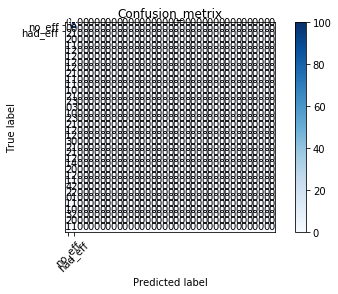

In [32]:
cm_plot_labels = ['no_eff', 'had_eff']
plot_confusion_metrix(cm=cm,classes=cm_plot_labels)